In [1]:
import matplotlib.pyplot as plt
import wordcloud
import jieba

import pandas as pd


In [4]:
df = pd.read_excel(r'htf_fund_comment\2021-04-19.xls')

In [5]:
df.head()

,fund_name,fund_code,content,author,time_
0,汇添富养老2030混合(FOF),6763,这个有疑问找谁,基民878839ly51,04-19 01:14
1,汇添富消费升级混合,6408,看来今天可以肉,基民77l7z12205,04-19 10:35
2,汇添富消费升级混合,6408,[赞],基民77l7z12205,04-19 10:35
3,汇添富中证环境治理指数C,501031,广发环保今天又涨了三个点[滴汗],揚帆啟航,04-19 11:13
4,汇添富中证环境治理指数C,501031,今天没卖应该是对的,吃鸡吃波段周大生,04-19 11:00


In [7]:
comment = df.content
type(comment)

pandas.core.series.Series

In [10]:
comment_lst = comment.to_list()

In [77]:
# comment_lst

In [76]:
text = ",".join(comment_lst)
type(text)

str

In [78]:
word_ls = jieba.cut(text)
word_split = " ".join(word_ls)
# word_split

In [79]:
# 数据分析
# 词频统计
# 过滤掉虚词
word_split

'这个 有 疑问 找 谁 , 看来 今天 可以 肉 , [ 赞 ] , 广发 环保 今天 又 涨 了 三个 点 [ 滴汗 ] , 今天 没卖 应该 是 对 的 , 总算 等到 今天上午 这样 舒心 的 行情 了 , 今天 新能源 该 发力 了 , 中药 做到 世界 第一 ； 西药 ‘ 苯胺 洛芬 注射液 ’ 将 震惊 世界 , 中药 做到 世界 第一 ； 西药 ‘ 苯胺 洛芬 注射液 ’ 将 震惊 世界 , 即将 到期 开放 ， 这 半年 玩 了 个 寂寞 ， 盼 了 个 惆怅 。 敬请 阿 , 请问 一下 大神 们 今天 怎么 卖 不了 呀 , 不 经过 大起大落 的 基民 ， 不是 一个 成熟 的 基民 ！ 基民 本来 , 回本 还 早 , 唉 ！ 大盘 下跌 时 你 一泻千里 。 大盘 上涨 时 你 蜗牛 搬家 。 受 , 该 不会 又 是 高开低走 的 一天 吧 ？ , 今天 大盘 这么 拉 ， 黑色 419 魔咒 要 破 啊 ， 但是 感觉 后头 总 , 稳住 [ 拜神 ] [ 拜神 ] [ 拜神 ] , 接下来 好涨 ， 继续 保持 , 刚卖 了 又 大涨 [ 滴汗 ] , 小胡 又 发新 基金 了 ， 大家 还 买 吗 ？ , 还是 全部 酒 吗 , 自选 都 红 了 就 你 绿 , 低开 , 为什么 不调 仓 ， 第一季度 为什么 都 不 调仓 ， 这 也 叫 专业 吗 , 可 把 我们 坑苦 了 ！ 天天 赔钱 啊 ！ , 你 也 该 发力 了 , 这 版本 怎么 都 改 的 看不到 前面 的 净值 了 , 这 直播 怎么 能 看到 , 好多 人 不敢 动酒 ， 尤其 是 茅台 ， 但 我 觉得 目前 是 布局 的 好 , 今天 保持 着 ， 杨 总 好样 的 ！ 怪不得 还 买 你 的 未来 数字 。 , 我 还 记得 当年 7 毛 的 时候 一堆 人 喷 呢 ！ ！ ！ ！ 心态 不好 买 , 0.94 买 的 ， 啥 时 回本 。 , 看到 持仓 就 明白 了 , 是不是 开放日 买 了 也 要 放 六个月 , 今天 有点 腔调 了 , 基金 是 长期 看 ， 不用 急 , 还有 一个月 到期 ， 杨经理 加油 ， 今天 应该 能 翻红 了 , 6 个 月 真 可惜 ， 圈钱 几百亿 ， 吸干 基民 血 , 杨 总 真的 是 宇宙 第一 优秀

In [85]:
words = word_split.split(' ')
# words

In [103]:
from collections import Counter
cnt = Counter() # 创建Counter这个类
for word in words:
    cnt[word] += 1
# print(cnt.most_common())   #[('blue', 3), ('red', 2), ('green', 1)]
len(cnt)
    

497

In [87]:
# 过滤掉无用的词
filter = [',', '，', '了', '[', ']', '的', '！', '今天', '？', '是', '。', '我', '这',  '都', '又', '吗', '怎么', '你', '呀', '这么', '要', '时候', '看', '什么', '这个', '有', '个','不', '还', '啊', '总', '就', '能', '…', '该', '也', '人', '在', '点', '一下', '不是', '时',  '吧', '还是', '呢', '是不是', '真']


In [102]:
cnt1 = cnt
for i in filter:
    if i in cnt1.keys():
        del cnt1[i]
len(cnt1)


450

In [114]:
# cnt1.most_common()
filtered_words = []
for k,v in cnt1.most_common():
    for i in range(v):
        filtered_words.append(k)
# filtered_words

In [117]:
filtered_words_text = ' '.join(filtered_words)

(-0.5, 799.5, 599.5, -0.5)

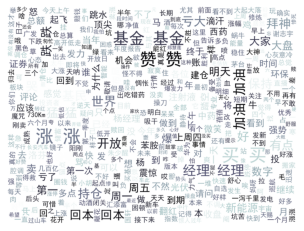

In [118]:
wc = wordcloud.WordCloud(
    width=800,
    height=600,
    background_color="#ffffff",  # 设置背景颜色
    max_words=2000,  # 词的最大数（默认为200）
    max_font_size=50,  # 最大字体尺寸
    min_font_size=10,  # 最小字体尺寸（默认为4）
    colormap='bone',  # string or matplotlib colormap, default="viridis"
    random_state=10, # 设置有多少种随机生成状态，即有多少种配色方案
    # mask=plt.imread("D:\\ryanoligen\\python_project\\htf_icon.png"),  # 读取遮罩图片！！
    font_path='D:\\ryanoligen\\python_project\\simhei.ttf'
)

my_wordcloud = wc.generate(filtered_words_text)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
wc.to_file('htf.png')  # 保存图片文件